# **Introduction**

**Company Background**
* Vivendo is a fast food chain in Brazil with over 200 outlets.
*  As with many fast food establishments, customers make claims against the company. For example, they blame Vivendo for suspected food poisoning.
* The legal team, who processes these claims, is currently split across four locations.
* The new
head of the legal department wants to see if there are differences in the time it takes to close
claims across the locations.

**Customer Question**
* The legal team has given you a data set where each row is a claim made against the company. They would like you to answer the following questions:
    * *How does the number of claims differ across locations?*
    * *What is the distribution of time to close claims?*
    * *How does the average time to close claims differ by location?* 

In [1]:
#Installing the latest matplotlib version
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('/content/Food Claims.csv')
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


## **Preliminary Wrangling**


* We are going to perform data wrangling using the criteria below.But first,lets make a copy of the original data



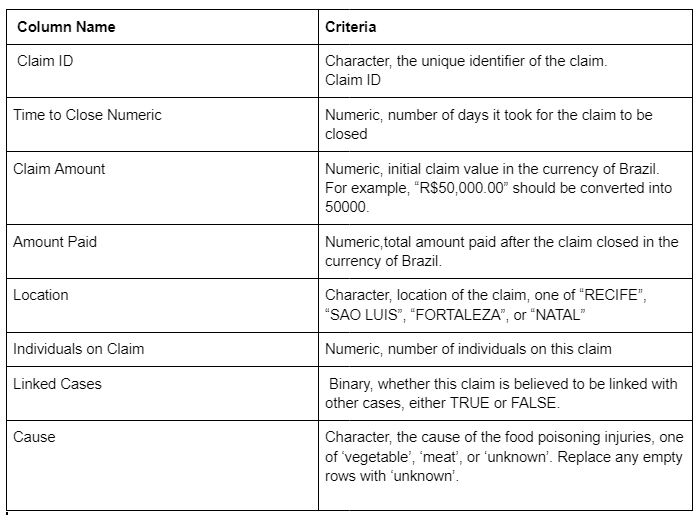

In [5]:
#Making a copy of the data
df_clean=df.copy()
#Checking for consistency in datatypes
df_clean.dtypes

Claim ID                 object
Time to Close             int64
Claim Amount             object
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

**Convert Claim Amount to integer**


In [6]:
#Replace characters in Claim Amount
df_clean['Claim Amount'] = df_clean['Claim Amount'].str.replace("$",'')
df_clean['Claim Amount'] = df_clean['Claim Amount'].str.replace("R",'')
df_clean['Claim Amount'] = df_clean['Claim Amount'].str.replace(",",'')


<ipython-input-6-8af14adb8afb>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Claim Amount'] = df_clean['Claim Amount'].str.replace("$",'')


In [7]:
#Convert to integer
df_clean['Claim Amount']=df_clean['Claim Amount'].astype(float)
df_clean['Claim Amount']=df_clean['Claim Amount'].astype(int)

In [8]:
#Confirm if converted to integer
df_clean.dtypes



Claim ID                 object
Time to Close             int64
Claim Amount              int64
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

**Replacing empty values to unknown**

In [9]:
#Check for null values
df_clean.isnull().sum()

Claim ID                 0
Time to Close            0
Claim Amount             0
Amount Paid              0
Location                 0
Individuals on Claim     0
Linked Cases             0
Cause                   78
dtype: int64

In [10]:
#Replace null values with 'Unknown'

df_clean['Cause'].fillna('unknown', inplace = True)

#Check if changes are made
df_clean['Cause'].isnull().sum()

0

**Renaming column names**

In [11]:
#Removing space in column names
df_clean.columns = df_clean.columns.str.replace(" ", "_")

#Ascertain change is made
df_clean.columns

Index(['Claim_ID', 'Time_to_Close', 'Claim_Amount', 'Amount_Paid', 'Location',
       'Individuals_on_Claim', 'Linked_Cases', 'Cause'],
      dtype='object')

## **Exploratory Data Analysis**

* We will explore our by building univariate, bivariate and multivariate visualizations and utilizing the Question-Visualization-Observations frame work throughout.
* A good place to start would be to obtain descriptive statistics of our variables 


### ***Univariate Analysis***

In [12]:

#Let's obtain descriptive statistics first and then make plots
df_clean.describe()

,Time_to_Close,Claim_Amount,Amount_Paid,Individuals_on_Claim
count,98.000000,98.000000,98.000000,98.000000
mean,832.346939,122952.030612,58448.238571,4.908163
std,686.851131,166433.389040,87525.873849,7.292259
min,-57.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


In [13]:
#Investigating the outlier
df_clean[df_clean['Time_to_Close']<0]


,Claim_ID,Time_to_Close,Claim_Amount,Amount_Paid,Location,Individuals_on_Claim,Linked_Cases,Cause
58,0000000-00.2019.0.00.0079,-57,3672,999.68,SAO LUIS,0,False,unknown


In [14]:
#Drop row
df_clean=df_clean[df_clean['Time_to_Close']>=0]

In [15]:
#Determine bins to use
np.sqrt(len(df_clean))

9.848857801796104

***What is the distribution of time to close claims?***

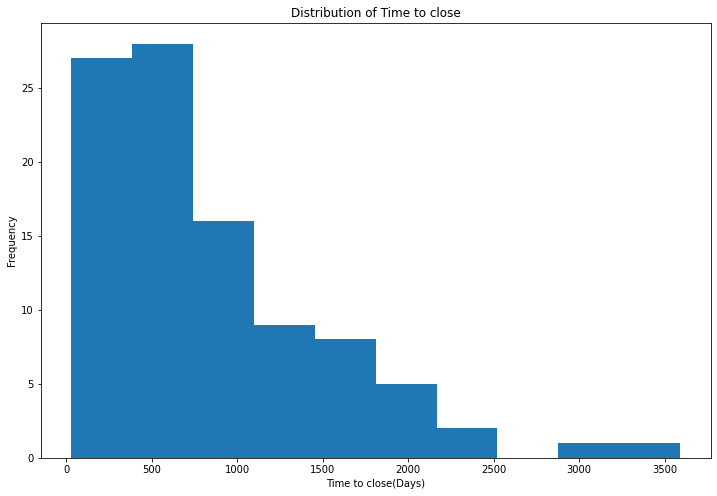

In [16]:
#Time_to_Close
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='Time_to_Close', bins=10)
plt.xlabel('Time to close(Days)')
plt.ylabel('Frequency')

plt.title('Distribution of Time to close')
plt.savefig('Time_to_Close.png');

* We can see the Time to close is mostly between 0 and 1200 days.
* We have a case which a claim was closed 57 days before the claim which has been removes as this is an outlier
* 75% of the claims take less than 1140 days i.e up to 3 years to close.	
* It would be interesting to see if the days to close varies across different alleged causes to food poisoning.

**What is the distribution of claim amount**

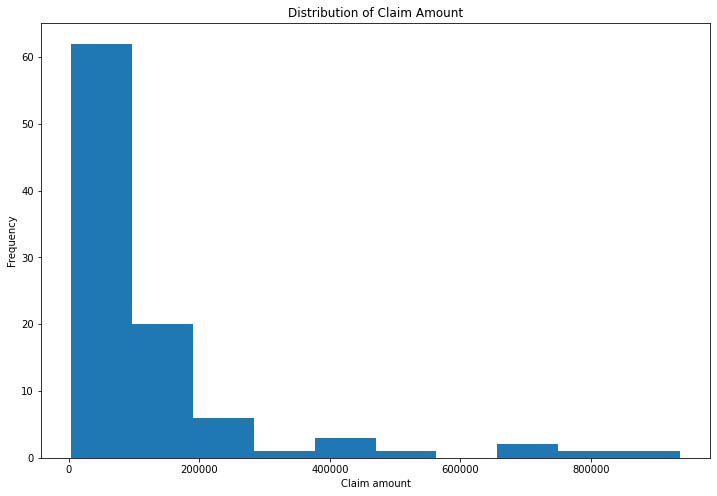

In [17]:
#Claim Amount
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='Claim_Amount', bins=10)
plt.xlabel('Claim amount')
plt.ylabel('Frequency')

plt.title('Distribution of Claim Amount');

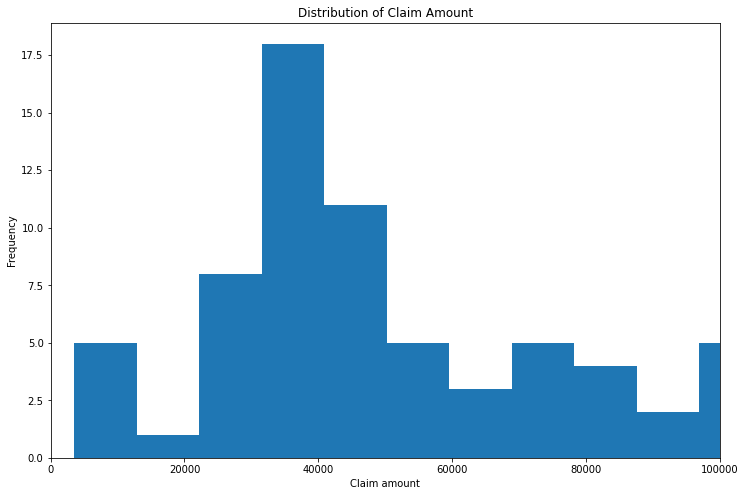

In [18]:
#Lets zoom in on where majority of the points lie

#Claim Amount
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='Claim_Amount', bins=100)
plt.xlim(0,100000)
plt.xlabel('Claim amount')
plt.ylabel('Frequency')

plt.title('Distribution of Claim Amount');

* 75% of claimed amount falls below 136,573,with most claimed amounts in the between  20000 and 50000
* It would be interesting to see the relationship with the actual amount paid out and the variation between the two

**What is the distribution of paid amount**

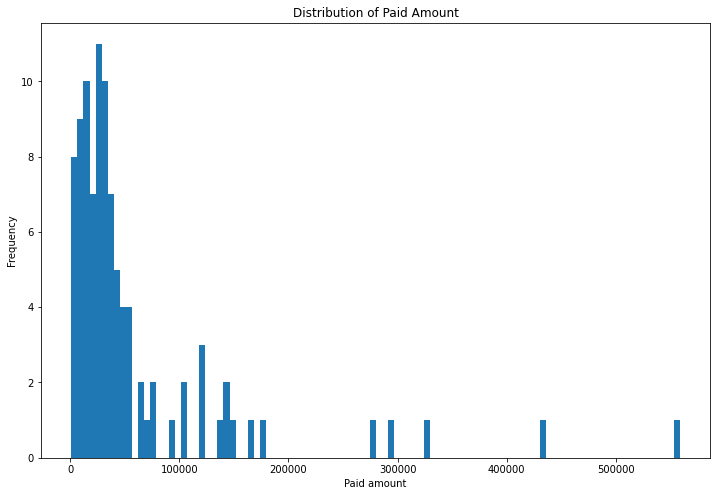

In [19]:
# Amount Paid
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='Amount_Paid', bins=100)
plt.xlabel('Paid amount')
plt.ylabel('Frequency')

plt.title('Distribution of Paid Amount');

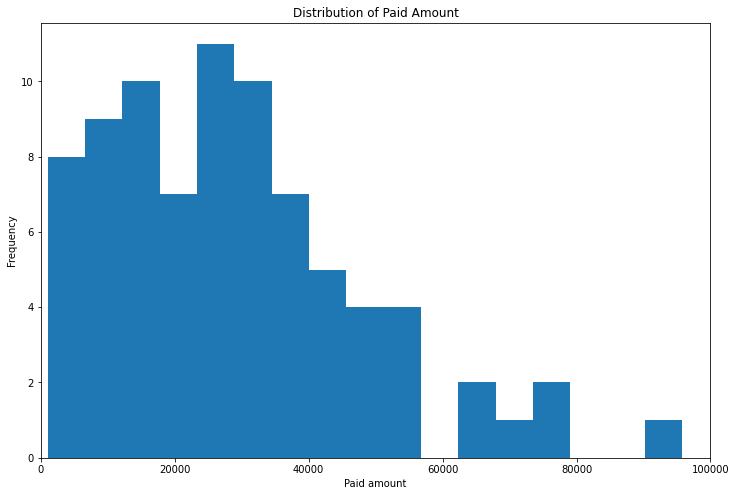

In [20]:
# Zooming in on Amount Paid
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='Amount_Paid', bins=100)
plt.xlim(0,100000)
plt.xlabel('Paid amount')
plt.ylabel('Frequency')

plt.title('Distribution of Paid Amount');

* Most paid amount lies below 100000,in particular largely concentrated below 40000 which is almost similar to that of how much had been claimed.
* We shall investigate this relationship later

**What is the distribution of individuals on each claim**

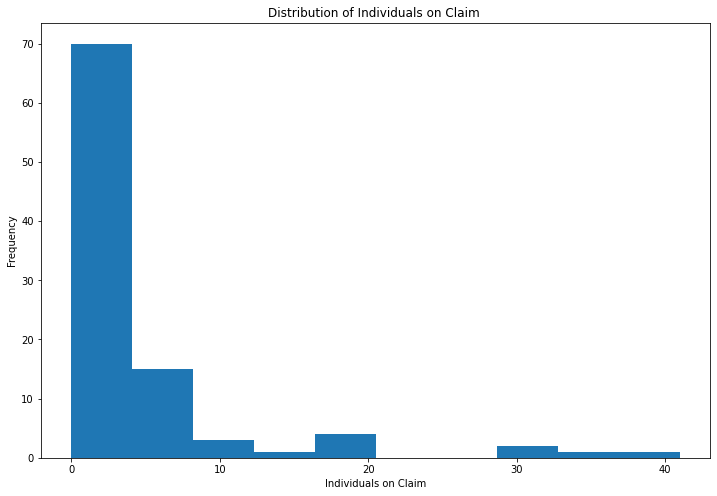

In [21]:
# Individuals on claim
plt.figure(figsize=(12, 8))

# Plot a standard scaled plot

plt.ticklabel_format(style='plain')
plt.hist(data=df_clean, x='Individuals_on_Claim', bins=10)
plt.xlabel('Individuals on Claim')
plt.ylabel('Frequency')

plt.title('Distribution of Individuals on Claim ')
plt.savefig('individuals.png');

* The majority of claims have less than 4 individuals present in the claim

**How does the number of claims differ across locations?**

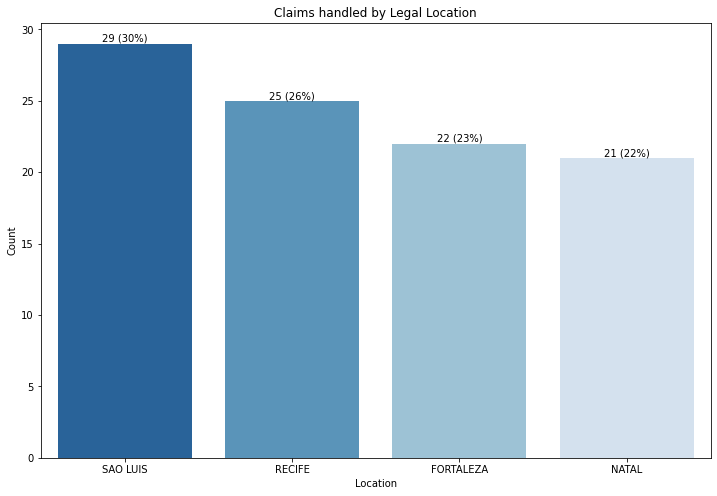

In [22]:
#lets'plot the categorical variables
#Location
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'Location', palette = "Blues_r",order=df_clean['Location'].value_counts(ascending=False).index)

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Claims handled by Legal Location')
ax.tick_params(bottom=True, left=True)
abs_values = df_clean['Location'].value_counts(ascending=False)
rel_values = df_clean['Location'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.savefig('location.png');

* 56% of claims are handled in SAO LUIS & RECIFE.
* NATAL and FORTALEZA handles the least claims

**Are there any claims with linked cases**

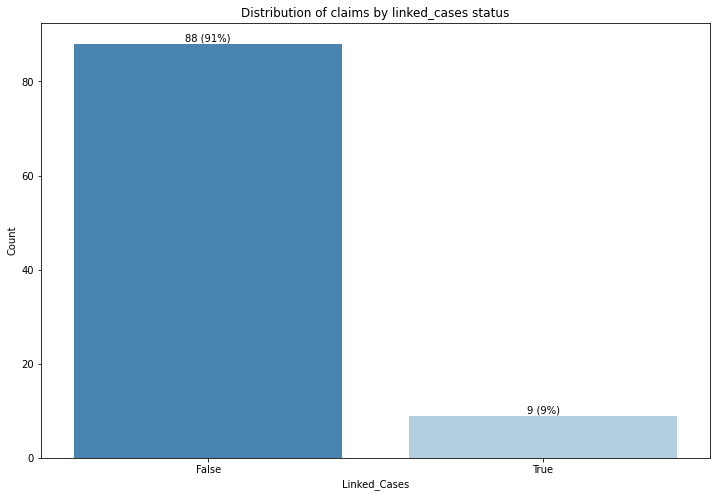

In [23]:

#Linked cases
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'Linked_Cases', palette = "Blues_r",order=df_clean['Linked_Cases'].value_counts(ascending=False).index)

plt.xlabel('Linked_Cases')
plt.ylabel('Count')
plt.title('Distribution of claims by linked_cases status')
ax.tick_params(bottom=True, left=True)
abs_values = df_clean['Linked_Cases'].value_counts(ascending=False)
rel_values = df_clean['Linked_Cases'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.savefig('linkedcases.png');

* 91% of claims have no linked cases
* It would be interesting to see the number of individuals on claims on those with linked cases  

**What is the major cause of poisoning amongst claims**

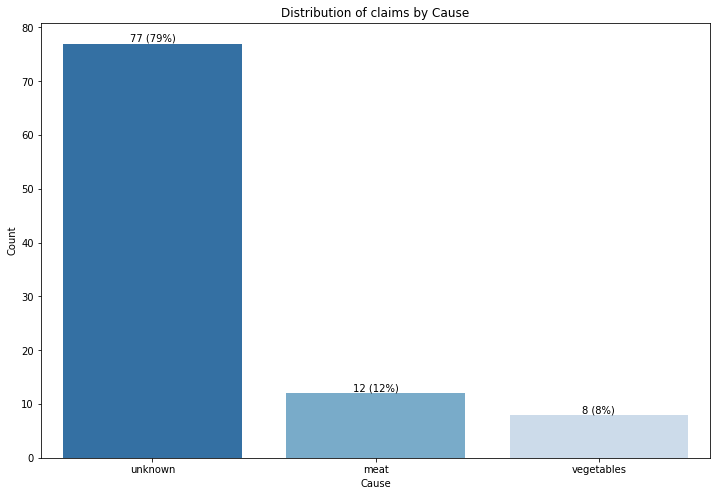

In [24]:

#Cause
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(data = df_clean, x = 'Cause', palette = "Blues_r",order=df_clean['Cause'].value_counts(ascending=False).index)

plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Distribution of claims by Cause')
ax.tick_params(bottom=True, left=True)
abs_values = df_clean['Cause'].value_counts(ascending=False)
rel_values = df_clean['Cause'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.savefig('cause.png');

* 79% of claims have unknown causes of the food poisoning injuries.
* The leading known causes are meat and vegetables respectively.

### ***Bivariate Analysis***

**How does the average time to close claims differ by location**

In [25]:
df_clean.groupby('Location')['Time_to_Close'].mean()

Location
FORTALEZA     775.500000
NATAL         581.142857
RECIFE        860.680000
SAO LUIS     1063.620690
Name: Time_to_Close, dtype: float64

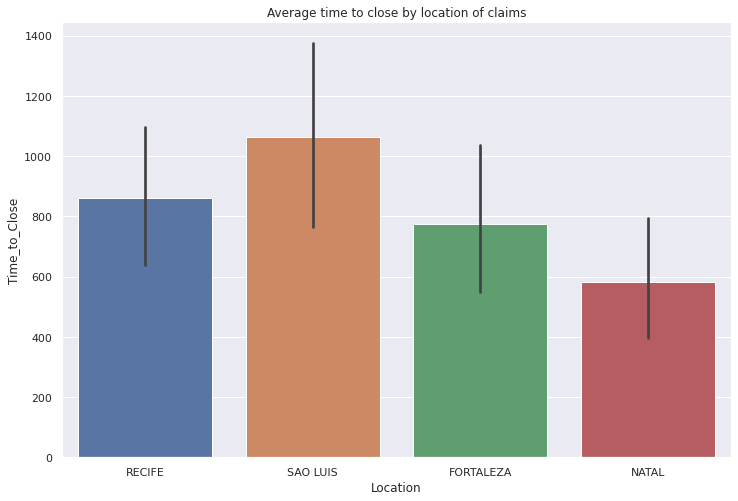

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='Location',y='Time_to_Close',data=df_clean)
plt.title("Average time to close by location of claims")
plt.savefig('timevslocation.png');

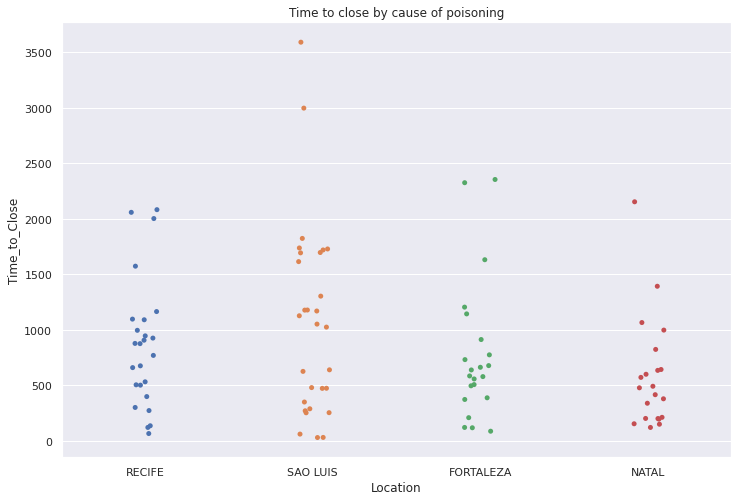

In [27]:

sns.stripplot(x='Location',y='Time_to_Close',data=df_clean)
plt.title("Time to close by cause of poisoning");

* SAO LUIS takes the longest on average to close claims i.e less than 4 years.
* This can be attributed to the fact that SAO LUIS handles the majority of the claims
* The opposite is true for NATAL which takes the least days
* There's a similar error bar across locations ,mostly because of extremes in time_to_close across locations

**Which food poisoning causes contribute to a lengthier time to close**

In [28]:
df_clean.groupby('Location')['Time_to_Close'].mean()

Location
FORTALEZA     775.500000
NATAL         581.142857
RECIFE        860.680000
SAO LUIS     1063.620690
Name: Time_to_Close, dtype: float64

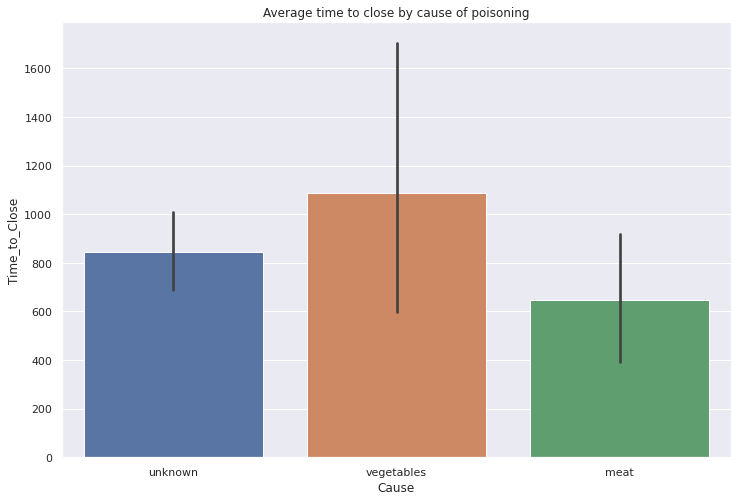

In [29]:

sns.barplot(x='Cause',y='Time_to_Close',data=df_clean)
plt.title("Average time to close by cause of poisoning")
plt.savefig('timevscause.png');

We have a very huge error bar in vegetables cause.Let's investigate this 

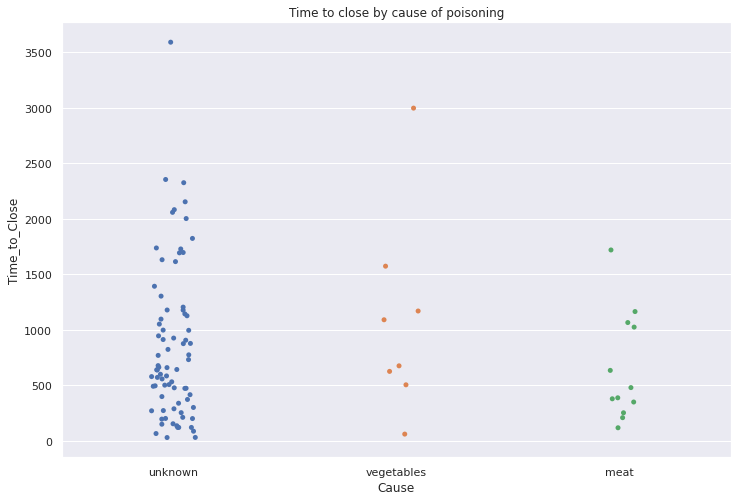

In [30]:

sns.stripplot(x='Cause',y='Time_to_Close',data=df_clean)
plt.title("Time to close by cause of poisoning");

* Unexpectedly,the lengthier cause of food poisoning claims is vegetables.
* You would expect claims with unknown causes ,to take longer time to solve as opposed to those with known causes
* Claims with meat as the cause of poisioning,take the least time to solve.
* The average time to close for vegetables is skewed mainly because of presence of minimal claims i.e 8 claims with very lengthier periods of closing.
* Taking a closer look , largely supports the theory that claims with unknow causes take longer than those without

**What is the location of claims with linked cases**

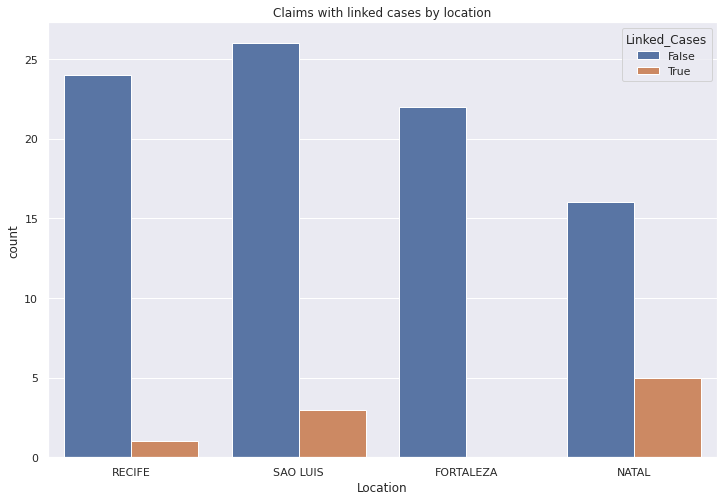

In [31]:
sns.countplot(x='Location',hue='Linked_Cases',data=df_clean,dodge=True)
plt.title("Claims with linked cases by location")
plt.savefig('locationvslinkedcase.png');

* NATAL handles the majority of claims with linked cases ,followed by SAO LUIS & RECIFE.
* FORTALEZA has no linked cases

**From claims with linked cases how many individuals do they have on claim**

In [32]:
df_clean.groupby('Linked_Cases')['Individuals_on_Claim'].mean()

Linked_Cases
False     2.931818
True     24.777778
Name: Individuals_on_Claim, dtype: float64

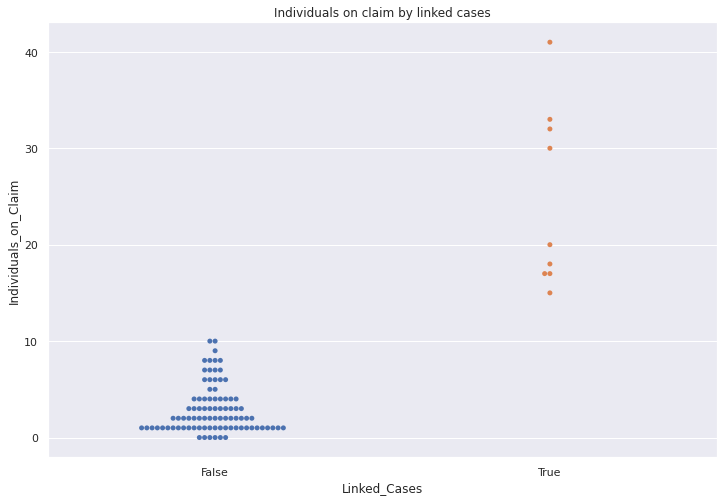

In [33]:
sns.swarmplot(x='Linked_Cases',y='Individuals_on_Claim',data=df_clean)
plt.title("Individuals on claim by linked cases");

* The claims with linked cases have the most of individuals in one claim.
* With extremes of 15-41 individuals on a claim which could answer why these are linked cases

**What is the relationship between individuals to claim and claim amount**

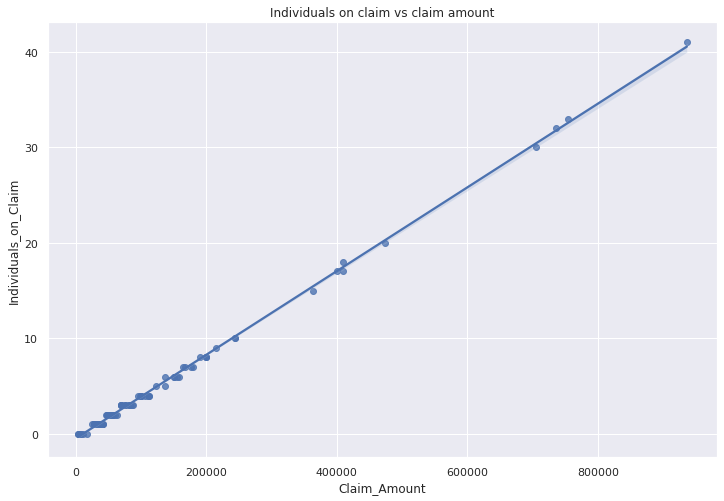

In [34]:

sns.regplot(x='Claim_Amount', y='Individuals_on_Claim', data=df_clean)
plt.title('Individuals on claim vs claim amount')
plt.savefig('individualsvsclaim');

* Claim amount has a linear relationship with individuals on claim.
* The more the individuals on claim,the higher the claim amount.

**What is the relationship between individuals to claim and paid amount**

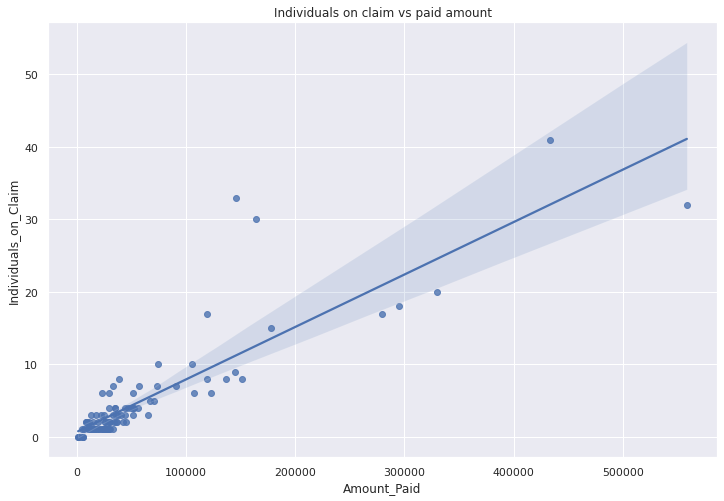

In [35]:
sns.regplot(x='Amount_Paid', y='Individuals_on_Claim', data=df_clean)
plt.title('Individuals on claim vs paid amount')
plt.savefig('individualvspaid');

* From the plot,the line of bestfit is surrounded by residuals.The linear relationship is not directly implied.
* For the majority of the claims,it is safe to say the more individuals on a claim the more the payout

**Do lengthier claims have higher claim amounts**

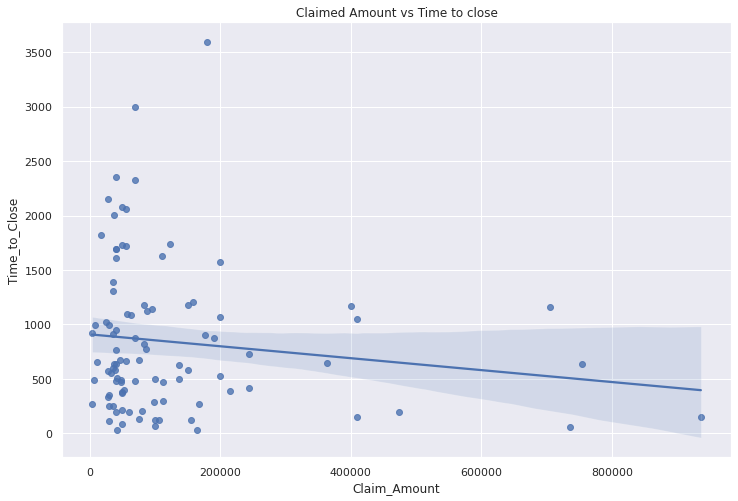

In [36]:
sns.regplot(x='Claim_Amount', y='Time_to_Close', data=df_clean)
plt.title('Claimed Amount vs Time to close');

* No linear relationship exists between claimed amount and time to close.
* We can see that lengthier claims actually have lesser claim amounts.

**Do lengthier claims have higher payouts**

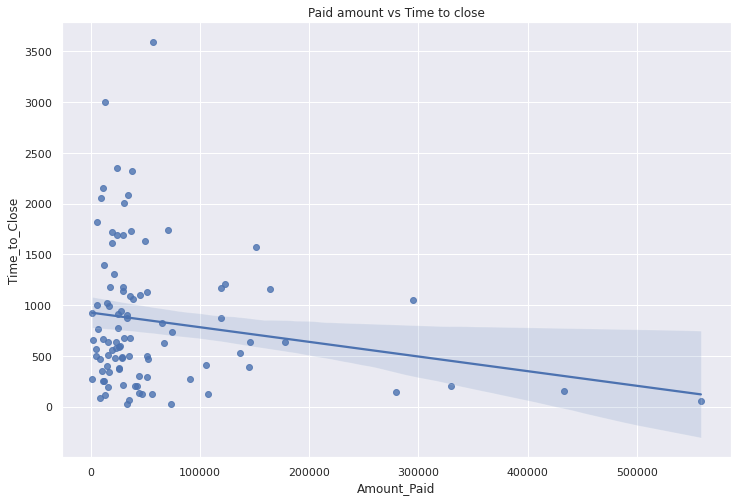

In [37]:
sns.regplot(x='Amount_Paid', y='Time_to_Close', data=df_clean)
plt.title('Paid amount vs Time to close')
plt.savefig('paidvstime.png');

* Similar to claim amount,no linear relationship exists between paid amount and time to close.
* We can see that lengthier claims actually have lesser paid amounts.

**Do linked cases have higher claimed amount**



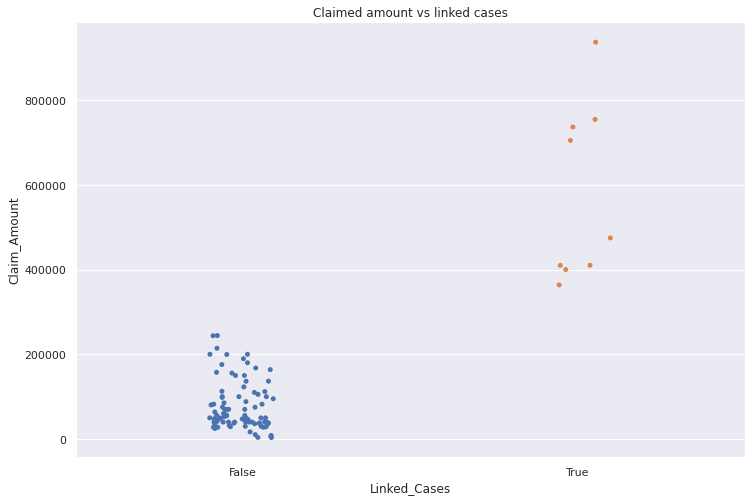

In [38]:
sns.stripplot(x='Linked_Cases',y='Claim_Amount',data=df_clean)
plt.title("Claimed amount vs linked cases");

* Linked Cases have higher claim amounts as opposed to unique cases

**Do linked cases have higher payouts**

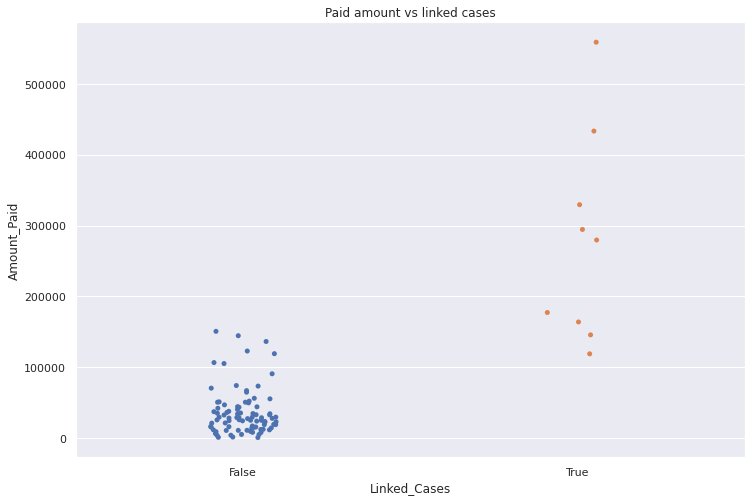

In [39]:
sns.stripplot(x='Linked_Cases',y='Amount_Paid',data=df_clean)
plt.title("Paid amount vs linked cases");

* Similar to claim amount,Linked Cases have higher paid amounts as opposed to unique cases

**Do linked cases take longer to close**

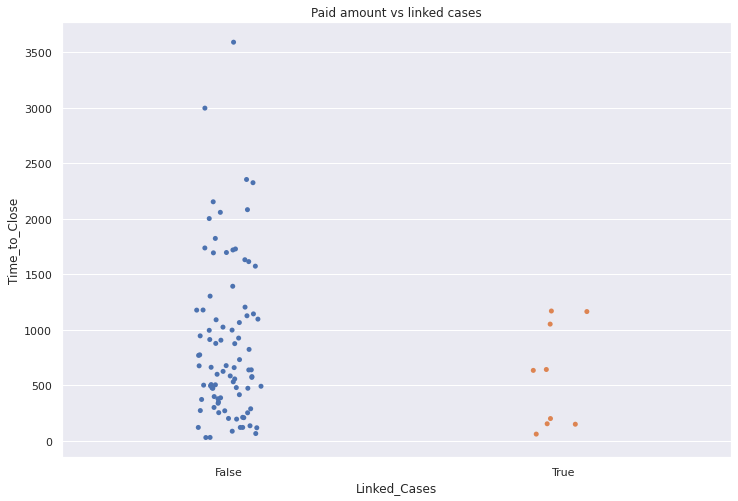

In [40]:
sns.stripplot(x='Linked_Cases',y='Time_to_Close',data=df_clean)
plt.title("Paid amount vs linked cases")
plt.savefig('paidvslinked');

* Linked cases take a shorter period to close than their counterparts

**Is the paid amount always similar to the claim amount**

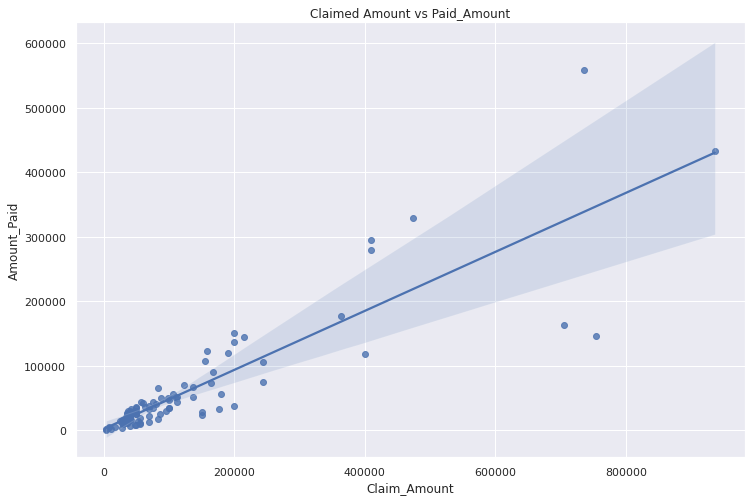

In [41]:
sns.regplot(x='Claim_Amount', y='Amount_Paid', data=df_clean)
plt.title('Claimed Amount vs Paid_Amount')
plt.savefig('paidvsclaimamount.png');

* For the most part,the claim amount is always higher than the paid amount

### ***Multivariate Analysis***

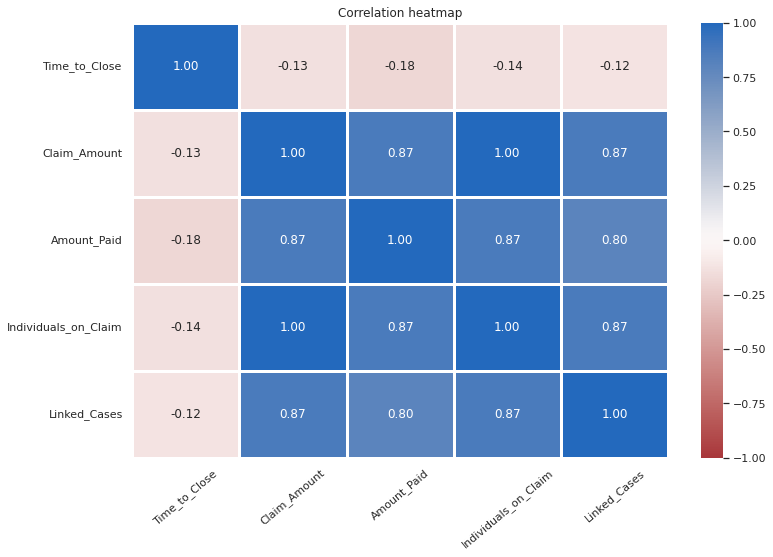

In [42]:
# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize= (12, 8))
sns.heatmap(data=df_clean.corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40)
plt.title('Correlation heatmap');

* Negative correlation exists between time to close & Claim_Amount,'Amount_Paid','Individuals_on_Claim' and 'Linked_Cases'

**How does the amount paid and claim amount vary across cause**

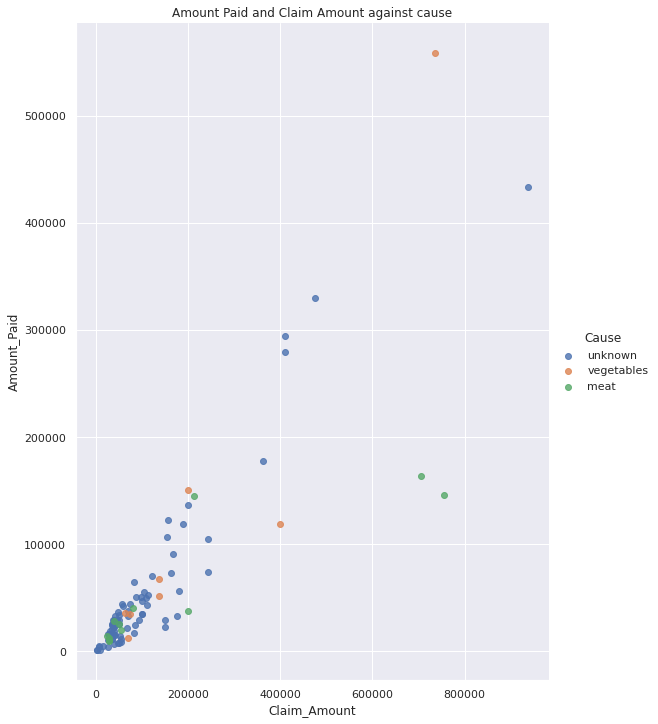

In [43]:
sns.lmplot(x='Claim_Amount', y='Amount_Paid', hue='Cause', 
           data=df_clean, 
           fit_reg=False,aspect=0.8,height=10)
plt.title('Amount Paid and Claim Amount against cause')
plt.savefig('paidclaimcause.png');

* The highest claim and paid amounts originate from unknown causes

## **Conclusion**

* There is a total of 98 claims made against the company.
* 79% of claims are made on 'unknown' causes of poisoning.
* SAO LUIS handles the most cases and NATAL the least cases.
* Typically,it takes up to 3 years to settle a claim.
* 91% of cases are unique with 9 cases linked to another,with NATAL handling the most linked cases.
* Claim amount and Paid amount are largely concentrated at below 100000.
* The higher the number of individuals on a claim,the higher the claim aount and paid amount
* Claims taking longer to close,have lesser payouts and claim amount.
* Claims with unknown causes take longer to close than those without.



* It would be great to see which outlets have most claims out of the 500.